# Report on Emergency Department Data


Time and costs are often highly correlated for operations carried out by organizations, and an effort to identify inefficiencies in operational processes can help make business decions with respect to optimization, improvement and resource allocation. 

In this report, I analyze the given data with the aim to support decision making for optimizing the time taken for patient treatment. I do so by using statstical insight based on Gaussian distributions, and correlation models for treatment time. 

The essential idea in using these tools is as follows:

If the distribution of a time variable has a Gaussian distribution with a narrow bell cure (i.e. low Std. Deviation), the process is better controlled because there is specified narrow time domain within which most patients will be treated. Conversely. if there distribution has a high Std. Deviation and variance, the process is not well controlled: time taken by the process varies greatly implying the process is not well defined and has ineffeciences. To identify, the causes of ineffeciences in the process, time distributions by categories are plotted to infer whether the category has a uncontrolled sub-process which is adding to the overall ineffeciency. 


In essence, this report aims to answer the following questions from the data:

1. Is the process of treating patients controlled with respect to the time it takes?
2. Is the process effecient, or ineffecient with respect to the time it takes?
3. Are there specific categories for patients/complaints for whom the process is more ineffecient? 
4. Are there  specific factors in patient sample which make the treatment ineffecient?
5. How did the ineffeciency impact the status of patients' treatment?


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import poisson

#importing dataset
df = pd.read_excel('data.xlsx', sheet_name= 'Emergency Data')


### Summary Analysis

Before data was analyzed based on the premiss, a quick summary analysis was performed to gain some insight on the raw data given. To do this a high-level summary on the data was performed. 

The MRN and Presentation Visit Number columns were dropped from the data frame since they were simply identifiers and did not shed light on relationships of value to making use of the data.

First, a quick statistical summary was obtained:

In [2]:
df.columns
df = df.drop(['MRN', 'Presentation Visit Number'], axis = 1)
df.describe()

,Triage Priority,Age (yrs),TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code
count,30188.000000,30188.000000,30188.000000,30187.000000,30169.000000
mean,3.265668,5.770969,204.656453,143.604797,18699.062282
std,0.686614,5.101561,176.633280,173.131043,9115.981561
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,94.000000,33.000000,9000.000000
50%,3.000000,4.000000,160.000000,87.000000,24000.000000
75%,4.000000,10.000000,262.000000,196.000000,24000.000000
max,5.000000,15.000000,5828.000000,5753.000000,73005.000000


30188 samples were given, with 5 levels of Triage Priority, 0 being highest and 5 being lowest. Patients Complaint description was mapped to specifed numerical codes, along with Diagnosis Descriptions and Codes. The Time Difference between the patient's arrival and departure was given, and the Time Difference between Treatment and Departure were given. Thus, the Time Difference between arrival and treatment could be found by simply taking the difference of the two to add as another column to the dataset. 


A matrix of scatterplots  between the different numerical variables for each sample was plotted to get an insight into the relationships within the data.The diagnol in the matrix was modified to represent kernel density functions of the intersecting variable based on the Gaussian kernel.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f403710>,
      dtype=object)

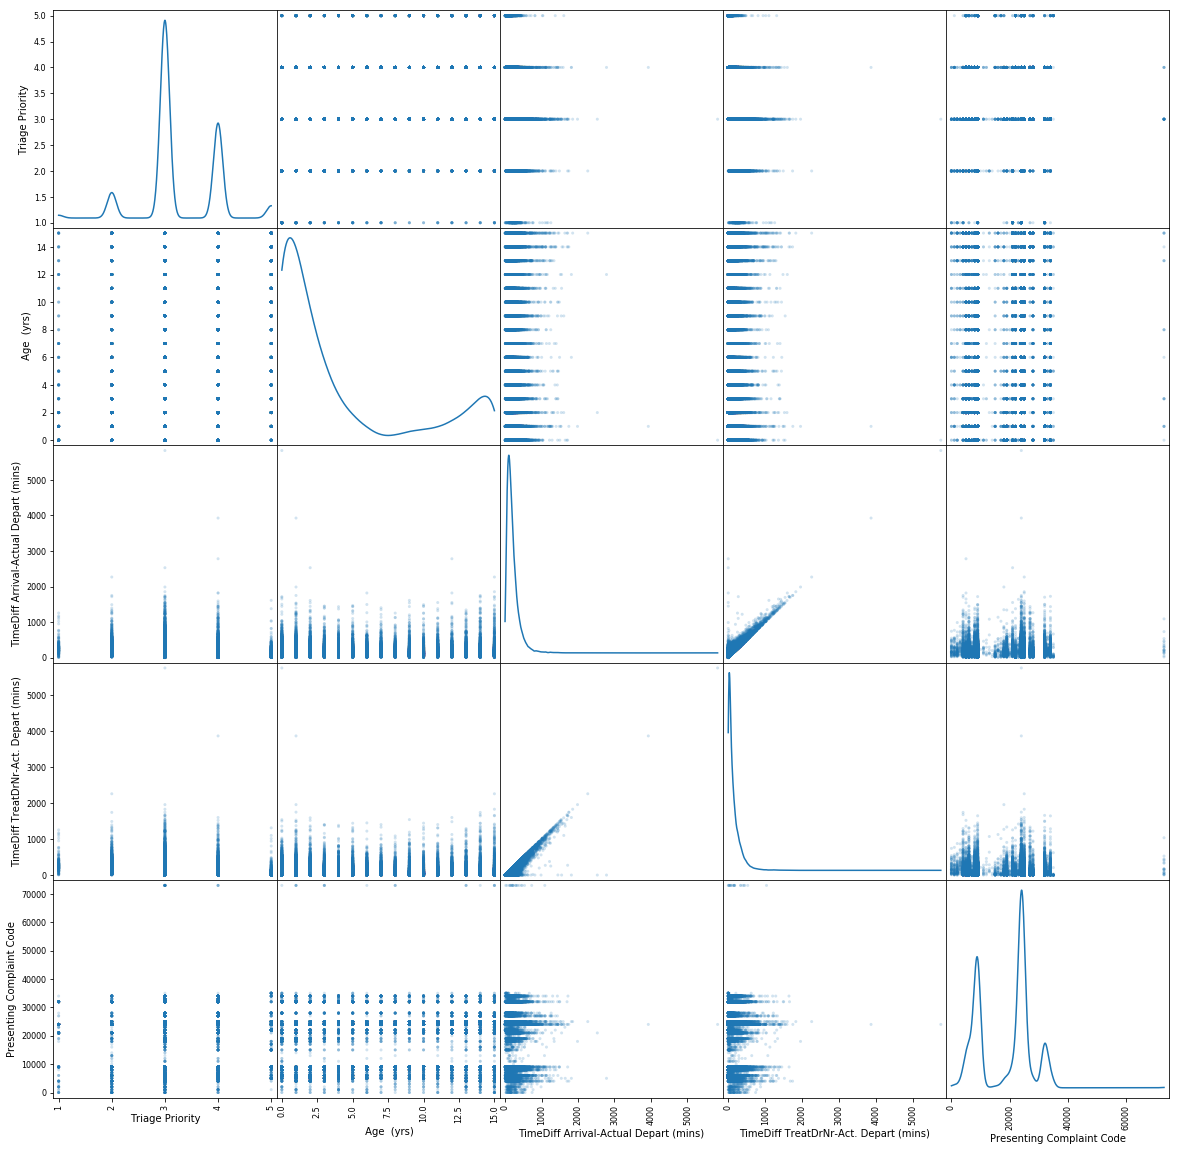

In [3]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20, 20), diagonal='kde')


The matrix helped infer the following relevant to our questions:
    
    1. Majority of the samples had a Triage Priority of 3 and 4.
    2. Majority of the samples had an age between 0-5 inclusive. The age had almost correlation with the time spent at the ED.
    3. The Triage Priority had some form of relationship with both the Time Difference variables. Triage Priorities at the median and closer to        it had higher waiting times compared to Priorties beyond the quartiles. 
    4. The two Time Difference variables had an obvious linear correlation, implying that 'Time Difference between Arrival and Departure' was          proportional to the Time Difference between Treatment and Departure. This help introduce a plausible assumption that the bottleneck was        was the treatment. Thus, it would be valuable to evaluate the duration between a patient's Arrival and Treatment. 
    
    


### Analyses

#### The Process

The process of patient treatment was broken down into two time intervals:
1. Interval between Arrival to being shown to a Doctor or Nurse for Treatment
2. Interval between Treatment to Departure. This interval also contained the time taken for treatment. 

The total time interval between Arrival and Departure was given in the dataset as 'TimeDiff Arrival-Actual Depart (mins)'.
(2.) was given as 'TimeDiff TreatDrNr-Act. Depart (mins)'

(1.), i.e. the time interval between a patient's Arrival and Treatment could be calculated for all samples and added to the dataset, as follows:

'treatmentInterval' = 'TimeDiff Arrival-Actual Depart (mins)' - 'TimeDiff TreatDrNr-Act. Depart (mins)'

In [133]:
df['treatmentInterval'] = df['TimeDiff Arrival-Actual Depart (mins)'] - df['TimeDiff TreatDrNr-Act. Depart (mins)']

#### Time Taken for Treatment Distribution

The first time dependant part of the process explored was the interval between Arrival and Treatment.
First, a simple density function of the time take for treatment was plotted:

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

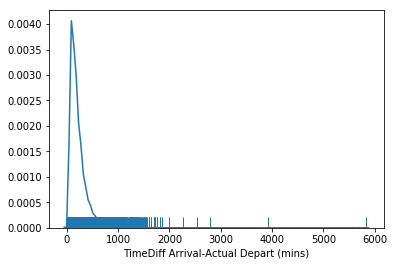

In [124]:
f = sns.distplot(df['TimeDiff Arrival-Actual Depart (mins)'], hist=False, kde = True, rug=True)


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


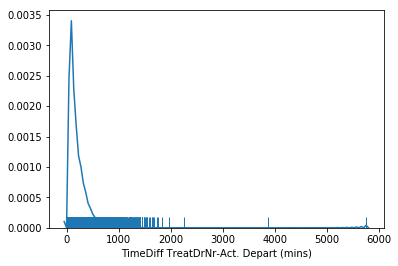

In [125]:
sns.distplot(df['TimeDiff TreatDrNr-Act. Depart (mins)'], hist=False, kde = True, rug=True)

In [131]:
df['TimeDiff Arrival-Actual Depart (mins)'].agg(['mean', 'std'])
df['TimeDiff TreatDrNr-Act. Depart (mins)'].agg(['mean', 'std'])

mean    143.604797
std     173.131043
Name: TimeDiff TreatDrNr-Act. Depart (mins), dtype: float64

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


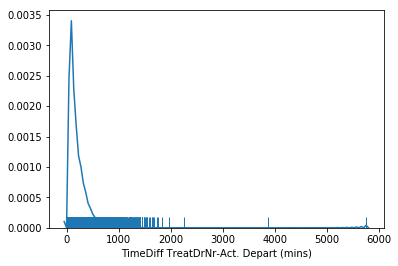

In [4]:
sns.distplot(df['TimeDiff TreatDrNr-Act. Depart (mins)'], hist=False, kde = True, rug=True)

Clearly some outliers in this distribution. These outliers may be due to specific reasons such as a particular disease type, a particular instance of operational ineffeciency. However, for purely statistical reasons, we will risk to make more applicable inferences from the  data by ignoring outliers. We bound the data by limiting the treatmentInterval variable to 600.

In [101]:
df_noOut['treatmentInterval'].agg(['mean', 'std'])

mean    60.441716
std     63.234067
Name: treatmentInterval, dtype: float64

This indicates that there is some minimal level of control in the process and majority our samples (excluding outliers) are treated within 200 minutes of arrival. On average, a patient takes an 1 hour to see a doctor/nurse on arrival. 

To understand whether there is a possibilty of improving the efficiency of this process, let us look at this interval categorized by Triage Priority. Naturally, we expect low triages to have a low time of treatment and extremely minimal standard deviation, because the more urgent the case, the more effecient and controlled the treatment process should be. 

##### Arrival-Treatment Interval Distribution over Triage Priority Categories

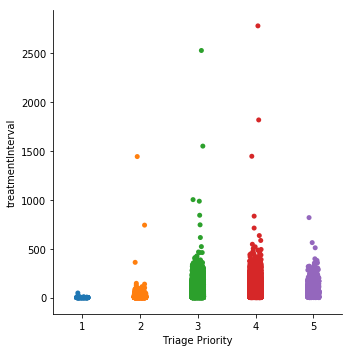

In [112]:
sns.catplot(x="Triage Priority", y="treatmentInterval", data=df)

This inference is logical since the interval between arrival and treatment for higher priorities will be smaller. 

The scatterplot above shows high standard deviation value for triage priority categories 3,4 and to some extent 5, while low standard deviations for triage priority categories 1 and 2. This implies that the process of dealing with patients coming in with priorties 1 and 2 is well defined,well controlled, and consequently effecient in terms of the time taken by these patients to see the doctor/nurse. This inference is logical since the interval between arrival and treatment for higher priorities will be smaller. 

Meanwhile, the process of dealing with patients with triage priorities identified as 3, 4, 5 had a high standard deviation and therefore was not well defined, well controlled and ineffecient. 

Thus, a decision maker would arguably focus on revisiting the process to deal with triage priorities 3,4, and 5 and allocate more resources for its optimization. 

Again there are some outliers for each case. We will again bound our data to remove outliers to get more appropriate statistical inferences of how effeciently the pateients in a particular triage category will be treated. 

In [6]:
tp1 = df.loc[df['Triage Priority'] == 1].sort_values('treatmentInterval')
tp2 = df.loc[df['Triage Priority'] == 2].sort_values('treatmentInterval')
tp3 = df.loc[df['Triage Priority'] == 3].sort_values('treatmentInterval')
tp4 = df.loc[df['Triage Priority'] == 4].sort_values('treatmentInterval')
tp5 = df.loc[df['Triage Priority'] == 5].sort_values('treatmentInterval')

tp1 = tp1.loc[tp1['treatmentInterval'] <= 10]
tp3 = tp3.loc[tp3['treatmentInterval'] <= 700]
tp4 = tp4.loc[tp4['treatmentInterval'] <= 800]
tp5 = tp5.loc[tp5['treatmentInterval'] <= 600]
tp2 = tp2.loc[tp2['treatmentInterval'] <= 200]


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


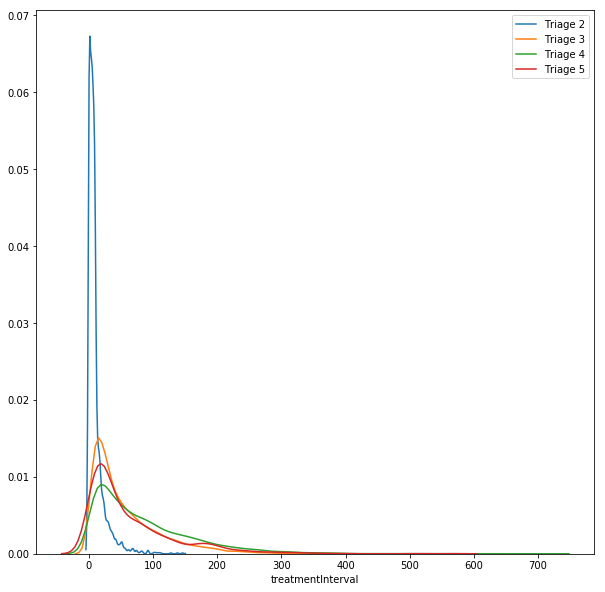

In [13]:
f = plt.figure(figsize = (10,10))
sns.distplot(tp2['treatmentInterval'], hist = False, kde = True, label = 'Triage 2')
sns.distplot(tp3['treatmentInterval'], hist = False, kde = True, label = 'Triage 3')
sns.distplot(tp4['treatmentInterval'], hist = False, kde = True, label = 'Triage 4')
sns.distplot(tp5['treatmentInterval'], hist = False, kde = True, label = 'Triage 5')
 

The category with the most inefficient process is triage 4, followed by 5,3 and 2. 

In [29]:
df_mod = df.groupby('Triage Priority')['treatmentInterval'].agg(['mean', 'std'])
df_mod.drop([1])

,mean,std
Triage Priority,,
2,11.154380,36.969349
3,57.348925,61.204023
4,83.396025,84.466497
5,65.075540,73.260135


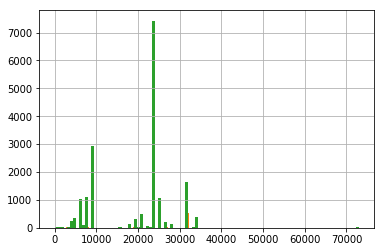

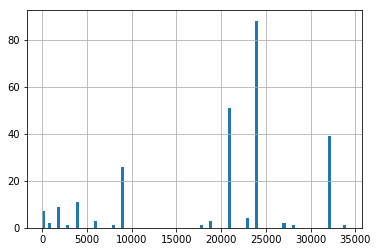

In [88]:
tp1['Presenting Complaint Code'].hist(bins = 100)

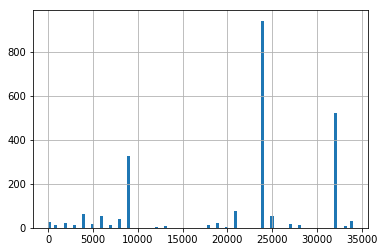

In [89]:
tp2['Presenting Complaint Code'].hist(bins = 100)


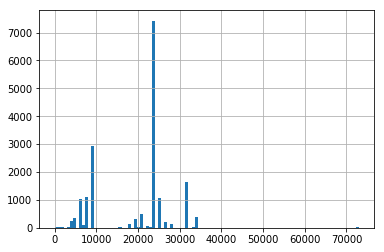

In [90]:
tp3['Presenting Complaint Code'].hist(bins = 100)

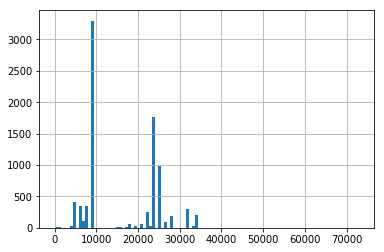

In [91]:
tp4['Presenting Complaint Code'].hist(bins = 100)

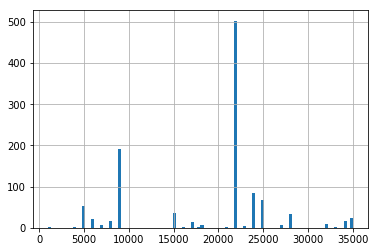

In [92]:
tp5['Presenting Complaint Code'].hist(bins = 100)

In [135]:
df.groupby('Triage Priority').hist('Presenting Complaint Code', bins = 100)

In [149]:
df[' Age  (yrs)'].median()


4.0

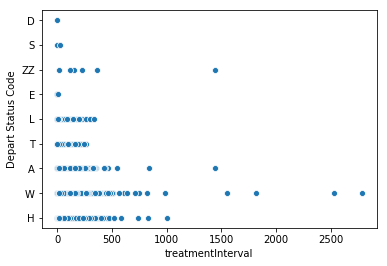

In [98]:
sns.scatterplot(x ='treatmentInterval', y = 'Depart Status Code', data = df)

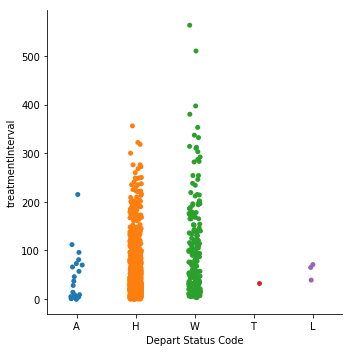

In [105]:
sns.catplot(y ='treatmentInterval', x = 'Depart Status Code', data = tp5) 

In [155]:
df['Depart Status Code'].describe()

count     30188
unique        9
top           H
freq      22864
Name: Depart Status Code, dtype: object

In [156]:
3303/30188

0.1094143368225785

In [157]:
df['Depart Status Code'].value_counts()

H     22864
A      3364
W      3303
T       424
L       217
ZZ        6
E         6
S         3
D         1
Name: Depart Status Code, dtype: int64

In [159]:
3364/30188

0.11143500728766398